## **Apuntes Semana 8**

* Nombre: Rafael J. Mateo C
* Matrícula: A01793054
* Materia: Ciencia y Analítica de Datos
* Profesor: María de la Paz
* Fecha: 7 Nov 2022

In [85]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Entrenamiento y prueba**

Primero importamos los datos

In [86]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

Obtenemos los datos numéricos solamente

In [87]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Definimos algunas funciones que estaremos usando

In [88]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #Se sustituye distplot por histplot, ya que está deprecated
    ax1 = sns.histplot(RedFunction, kde=True, stat="density", linewidth=0, color="r", label=RedName)
    ax2 = sns.histplot(BlueFunction, kde=True, stat="density", linewidth=0, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [89]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Definimos las xs y la y

In [90]:
y_data = df['price']

In [91]:
x_data=df.drop('price',axis=1)

Hacemos la partición. Esto es importante, ya que evitamos la filtración de datos. La idea es tener una parte para entrenar y otro conjunto más pequeño para probar el desempeño del modelo.

In [92]:
from sklearn.model_selection import train_test_split

#se selecciona 10% del total de los datos para prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


### **2. Selección del Modelo**

Entrenamos un modelo de regresión lineal y hacemos las predicciones con el conjunto de prueba.

In [121]:
from sklearn.linear_model import LinearRegression

#Entrenamos el modelo
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [94]:
#Predecimos el conjunto de entrenamiento para comprar con las predicciones del conjunto de prueba. esto nos dirá si hay sobreentrenamiento o subentrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [95]:
#Aquí usamos el conjunto de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

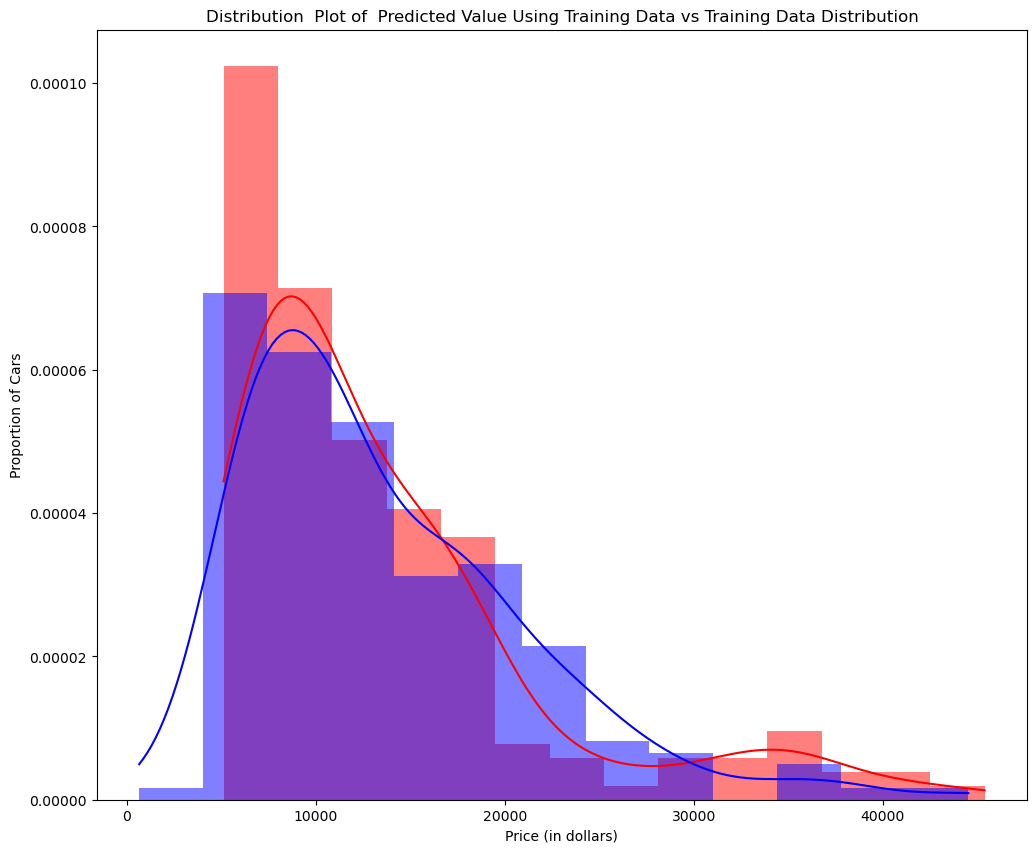

In [96]:
#Realizamos la gráfica
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Del gráfico anterior se observa que el desempeño es muy similar entre lo predicho para entrenamiento y los datos reales de entrenamiento. Pero es necesario probar el modelo con datos que nunca ha visto. Probemos con el conjunto de prueba

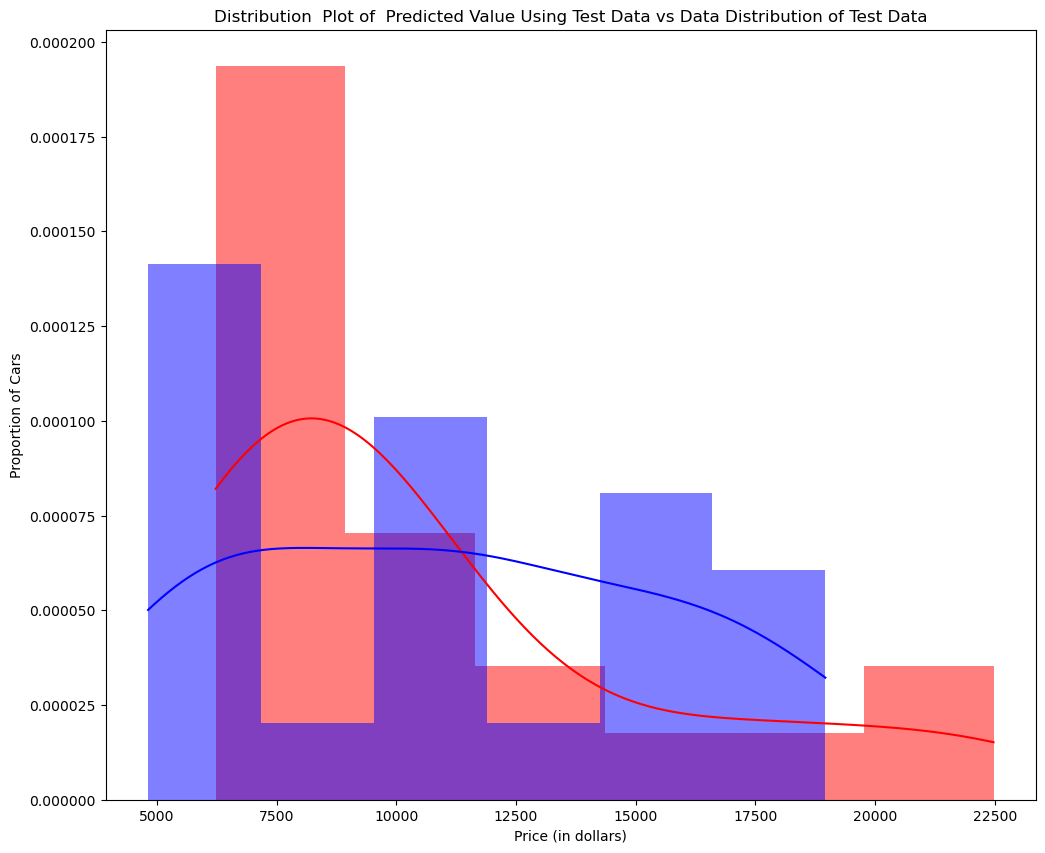

In [97]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Aquí se nota una mayor diferencia, puessto que el modelo está captando patrones del conjunto de entrenamiento que realmente no existen. Ahora probemos con otro modelo.

In [98]:
from sklearn.preprocessing import PolynomialFeatures

Hacemos la partición de los datos

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Entrenamos el modelo

In [100]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [101]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [102]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65584343,  7307.98804401, 12213.78788102, 18893.24763375,
       19995.95145621])

In [119]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test.iloc[0:4].values)

Predicted values: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
True values: [ 6295. 10698. 13860. 13499.]


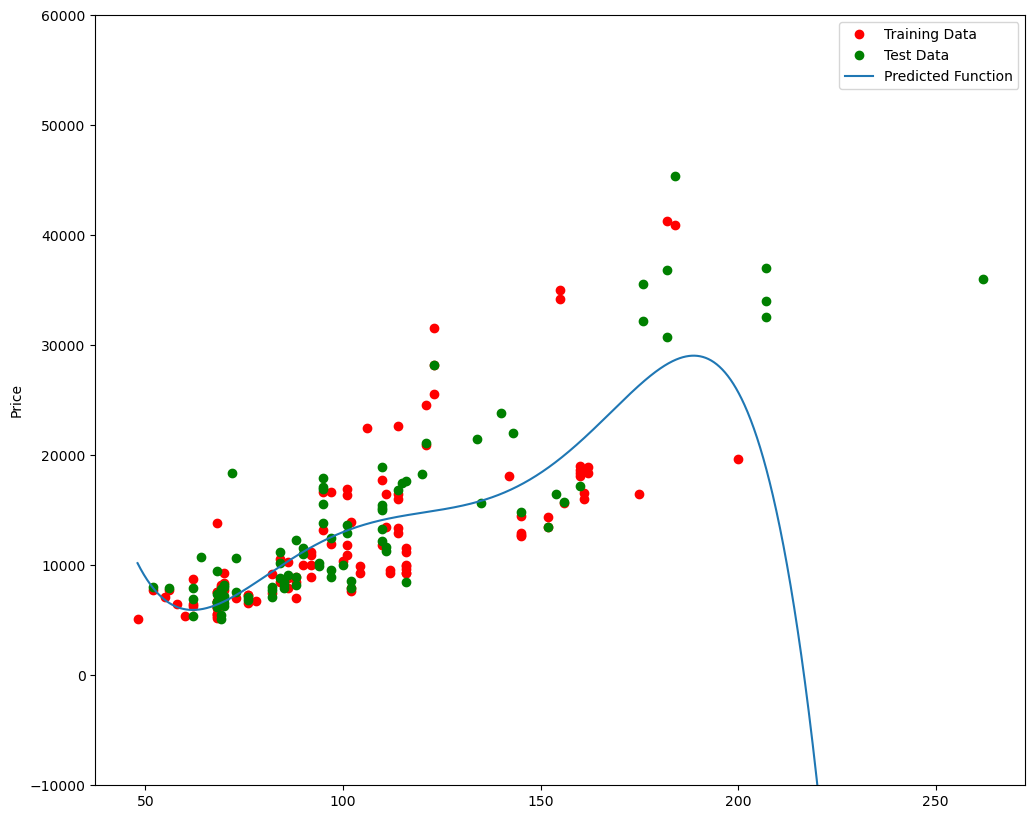

In [104]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [105]:
poly.score(x_train_pr, y_train)

0.5567716902127728

In [106]:
poly.score(x_test_pr, y_test)

-29.871341604869766

El score para los datos de prueba de Rˆ2 dio negativo, lo cual es un indicativo de sobreentrenamiento

Text(3, 0.75, 'Maximum R^2 ')

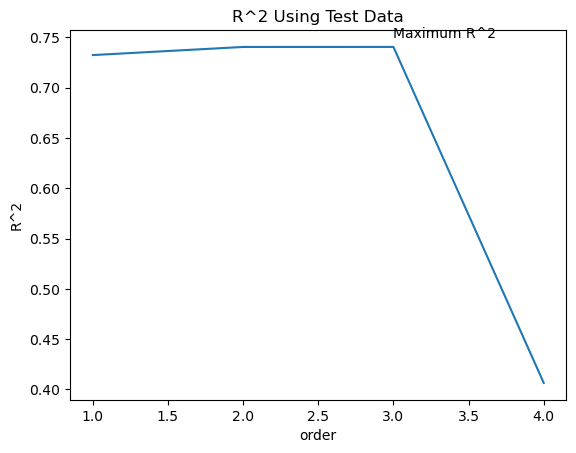

In [107]:
Rsqu_test = []
#Entrenamos el modelo con varios grados
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

En este gráfico se observa como R disminuye a partir de un orden mayor a 3. Esto es un indicio de sobreentrenamiento.

In [108]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [109]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### **3. Ridge Regression**

La regresión ridge penaliza el modelo para evitar el sobreentrenamiento.

In [110]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [111]:
from sklearn.linear_model import Ridge

In [112]:
RigeModel=Ridge(alpha=1)

In [113]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [114]:
yhat = RigeModel.predict(x_test_pr)

In [120]:
print('predicted:', yhat[0:4])
print('test set :', y_test.iloc[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [116]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
#barra de progreso
pbar = tqdm(Alpha)

for alpha in pbar:
    #Entrenamos el modelo
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    #Obtenemos las métricas
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:01<00:00, 570.95it/s, Test Score=0.564, Train Score=0.859]


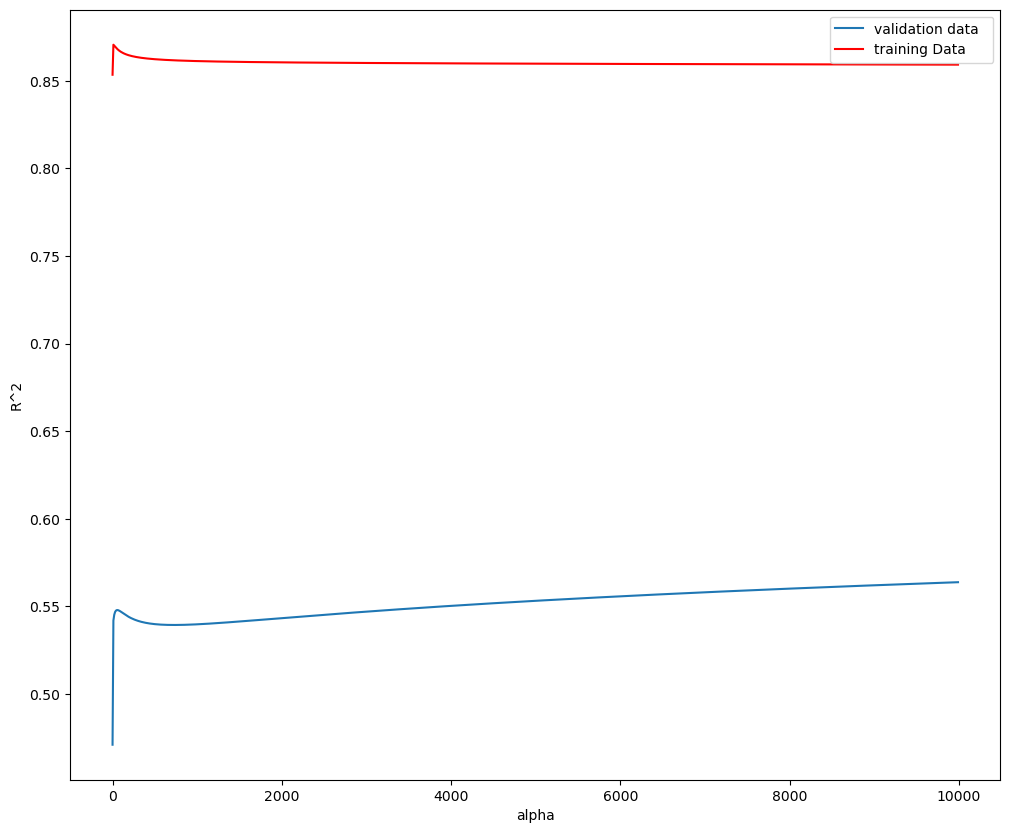

In [117]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Se evidencia que el desempeño del modelo es pobre

### **Graded reviews**

![img](graded-review-questions.png)